<a href="https://colab.research.google.com/github/dnjhaha/AML/blob/master/CS680Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danni Jin AI:680 Spring 2020 assignment #2
**In this project, you'll classify images from the CIFAR-10 dataset. The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded. You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers. At the end, you'll get to see your neural network's predictions on the sample images.**




**Importing the Required Libraries**

In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
#from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
from keras import backend as K
#K.set_image_dim_ordering('tf')
K.set_image_data_format('channels_last')
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 10
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


**Preparing the dataset: Load the cifar10 data from Keras. Setup train and test splits.**
Keras library already consists of all the standard datasets. So, we are just importing cifar10 from the library itself. Then, we use the load_data() method to load the data into the given train and test directories.

In [84]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train.shape:', X_train.shape)
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test_samples')

X_train.shape: (50000, 32, 32, 3)
50000 train_samples
10000 test_samples


**Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.**
Returns:
2 tuples:
x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32) or (num_samples, 32, 32, 3) based on the image_data_format backend setting of either channels_first or channels_last respectively.
y_train, y_test: uint8 array of category labels (integers in range 0-9) with shape (num_samples, 1).


In [0]:
#X_train=X_train.reshape(X_train.shape[0],32,32,3).astype('float32')
#X_test=X_test.reshape(X_test.shape[0],32,32,3).astype('float32')

# Normalization and One-Hot Encoding
Images are comprised of matrices of pixel values. Normally, pixels are expected to have value in the range 0-255. We need to normalize these values to a range between 0 and 1.

In [0]:
# Convert the image data to numeric data and normalize them,normalizing inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0 
X_test = X_test / 255.0

Now, we need to do one-hot encoding of these data so that it could be provided to machine learning algorithms to do a better job in prediction. One-hot is a group of bits among which the legal combinations of values are only those with a single high bit and all the others low. 

In [0]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train,10) 
y_test = np_utils.to_categorical(y_test,10) 
#num_classes = y_test.shape[1]
#X_train_one_hot=np_utils.to_categorical(X_train)
#X_test_oneHot=np_utils.to_categorical(X_test)

This will convert the matrices into binary matrices of width 10. We can’t just give the categorical data to the machine for processing. So, we need to do the above steps to make the data more processable for the machine.

# Creating the Image Classification Model
Let’s initialize a convolutional neural network using the sequential model of keras.

In [0]:
# Create the model 
model1 = Sequential()

You can use either Sequential or Functional methods for creating keras models. We are using sequential here to build our model since it allows us to create the model layer-by-layer.

**a simple ConvNet is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable function. We use three main types of layers to build ConvNet architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer (exactly as seen in regular Neural Networks). We will stack these layers to form a full ConvNet architecture.**

# Stage1:

Convolutional input layer, 32 feature maps with a size of 3×3 and a rectiﬁer activation function.
Max Pool layer with size 2×2.
. Fully connected layer with 1,024 units and a rectiﬁer activation function.
4.Flattened layer

Fully connected output layer with 10 units and a softmax activation function.

In [0]:
# network 
model1.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:],data_format='channels_last'))
#Add the first convolutional layer
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
#Add the Max Pool
model1.add(Dense(1024))
# Add the fully-connected layer with 1024 units
model1.add(Activation('relu'))
model1.add(Flatten())
model1.add(Dense(NB_CLASSES))
model1.add(Activation('softmax'))

I will explain what each layer is. 

Conv2D stands for a 2-dimensional convolutional layer.

Here, 32 is the number of filters needed. A filter is an array of numeric values. (3,3) is the size of the filter, which means 3 rows and 3 columns.

The input image is 32 * 32 * 3 size, that is, 32 height, 32 widths, and 3 refer to RGB values. Each of the numbers in this array (32,32,3) is given values from 0 to 255, which describes the pixel intensity at that point.

The output of this layer will be some feature maps. A feature map is a map that shows some specific features of the image.



# Compiling the Model
We need to compile the CNN model before we train it. We can use the compile() method for this. Also, let’s define the learning rate for training.

In [0]:
lrate = 0.01 
sgd = SGD(lr=lrate, momentum=0.9, decay=1e-6,nesterov=False) 
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Categorical_crossentropy will compare the distribution of the predictions with the true distribution. SGD stands for stochastic gradient descent, which is a classical optimization algorithm.

We also set the metrics to accuracy so that we will get the details of the accuracy after training.

# Training the Image Classification Model
Now, it is time to train our model and see its accuracy. We can use the fit() method of keras to train the CNN.

In [98]:
history=model1.fit(X_train, y_train, epochs = 10, batch_size=32, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 207s 5ms/step - loss: 1.6150 - acc: 0.4200 - val_loss: 1.3451 - val_acc: 0.5323
Epoch 2/10
40000/40000 [==============================] - 207s 5ms/step - loss: 1.2195 - acc: 0.5731 - val_loss: 1.2251 - val_acc: 0.5754
Epoch 3/10
40000/40000 [==============================] - 207s 5ms/step - loss: 1.0478 - acc: 0.6352 - val_loss: 1.0899 - val_acc: 0.6225
Epoch 4/10
40000/40000 [==============================] - 206s 5ms/step - loss: 0.9176 - acc: 0.6813 - val_loss: 1.0642 - val_acc: 0.6366
Epoch 5/10
40000/40000 [==============================] - 207s 5ms/step - loss: 0.7923 - acc: 0.7266 - val_loss: 1.0500 - val_acc: 0.6457
Epoch 6/10
40000/40000 [==============================] - 207s 5ms/step - loss: 0.6814 - acc: 0.7640 - val_loss: 1.0730 - val_acc: 0.6565
Epoch 7/10
40000/40000 [==============================] - 208s 5ms/step - loss: 0.5745 - acc: 0.8001 - val_loss: 1.1214 - 

In [99]:
# Final evaluation of the model 
scores = model1.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 63.14%


# Visualizing Accuracy
Import the relevant package we need to do the visualization

In [0]:
import matplotlib.pyplot as plt

visualize the training accuracy and the validation accuracy :

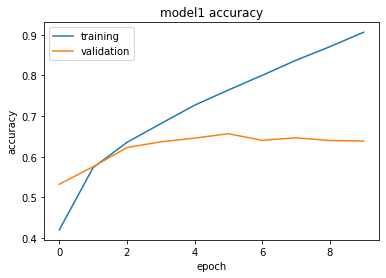

In [101]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


Conclusion：As you can see from this image, I trained the model for 10 epochs to get an accuracy of 81.23%.   It took a long time, even with a GPU powered system. Do not try to train your model using a normal laptop, because it will take a lot of power and resources and there is a high chance of occurring damage to your laptop.

# Stage 2:                 

Use samepadding if needed- Model.add(Maxpooling2D(2,2, paddinf=’same’))

Convolutional input layer, 32 feature maps with a size of 3×3 and a rectiﬁer activation function.
Convolutional layer, 32 feature maps with a size of 3×3 and a rectiﬁer activation function.
Max Pool layer with size 2×2.
Convolutional layer, 64 feature maps with a size of 3×3 and a rectiﬁer activation function.
Convolutional layer, 64 feature maps with a size of 3×3 and a rectiﬁer activation function.
Max Pool layer with size 2×2.
Convolutional layer, 128 feature maps with a size of 3×3 and a rectiﬁer activation function.
Convolutional layer, 128 feature maps with a size of 3×3 and a rectiﬁer activation function.
Max Pool layer with size 2×2.
Flatten layer.
Dropout layer at 20%.
Fully connected layer with 1,024 units and a rectiﬁer activation function.
Dropout layer at 20%.
Fully connected layer with 512 units and a rectiﬁer activation function.
Dropout layer at 20%.
Fully connected output layer with 10 units and a softmax activation function.

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu',data_format='channels_last')) 
model2.add(Conv2D(32, (3, 3), activation='relu')) 
model2.add(MaxPooling2D(2, 2,padding='same')) 
model2.add(Conv2D(64, (3, 3), activation='relu')) 
model2.add(Conv2D(64, (3, 3), activation='relu')) 
model2.add(MaxPooling2D(2, 2,padding='same')) 
model2.add(Conv2D(128, (3, 3), activation='relu')) 
model2.add(Conv2D(128, (3, 3), activation='relu')) 
model2.add(MaxPooling2D(2, 2,padding='same')) 
model2.add(Flatten()) 
model2.add(Dropout(0.2)) 
model2.add(Dense(1024, activation='relu')) 
model2.add(Dropout(0.2)) 
model2.add(Dense(512, activation='relu')) 
model2.add(Dropout(0.2)) 
model2.add(Dense(num_classes, activation='softmax'))

We use the Dropout layer in our model to prevent overfitting. Overfitting is a modeling error that occurs to make an overly complex model. This layer drops out a random set of activations in that layer by setting them to zero as data flows through it.
MaxPooling layer is used for pooling. Pooling reduces the dimensionality of each feature map but retains the most important information. This helps to decrease the computational complexity of our network.

Flatten is used to convert the feature map to 1-dimension. We use the Dense function to initialize a fully connected network.

An activation function of a neuron defines the output of that neuron, given some input. This output is then used as input for the next neuron and so on until the desired solution is obtained.

We use ReLu and softmax activation functions in this model. ReLU replaces all the negative pixel values in the feature map with 0. Softmax takes as input a vector of K real numbers and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers.

# Compiling the Model
We need to compile the CNN model before we train it. We can use the compile() method for this. Also, let’s define the learning rate for training.

In [0]:
lrate = 0.01 
sgd = SGD(lr=lrate, momentum=0.9, decay=1e-6,nesterov=False) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Categorical_crossentropy will compare the distribution of the predictions with the true distribution. SGD stands for stochastic gradient descent, which is a classical optimization algorithm.

We also set the metrics to accuracy so that we will get the details of the accuracy after training.

# Training the Image Classification Model
Now, it is time to train our model and see its accuracy. We can use the fit() method of keras to train the CNN.

In [121]:
history1=model2.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 183s 5ms/step - loss: 2.0016 - acc: 0.2385 - val_loss: 1.6083 - val_acc: 0.4065
Epoch 2/10
40000/40000 [==============================] - 183s 5ms/step - loss: 1.5699 - acc: 0.4245 - val_loss: 1.4275 - val_acc: 0.4832
Epoch 3/10
40000/40000 [==============================] - 183s 5ms/step - loss: 1.3571 - acc: 0.5132 - val_loss: 1.2075 - val_acc: 0.5628
Epoch 4/10
40000/40000 [==============================] - 183s 5ms/step - loss: 1.1908 - acc: 0.5781 - val_loss: 1.0824 - val_acc: 0.6175
Epoch 5/10
40000/40000 [==============================] - 182s 5ms/step - loss: 1.0607 - acc: 0.6295 - val_loss: 1.0930 - val_acc: 0.6122
Epoch 6/10
40000/40000 [==============================] - 183s 5ms/step - loss: 0.9623 - acc: 0.6651 - val_loss: 0.9974 - val_acc: 0.6558
Epoch 7/10
40000/40000 [==============================] - 181s 5ms/step - loss: 0.8944 - acc: 0.6920 - val_loss: 0.9355 - 

In [122]:
# Final evaluation of the model 
scores = model2.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 69.13%


# Visualizing Accuracy
visualize the training accuracy and the validation accuracy :

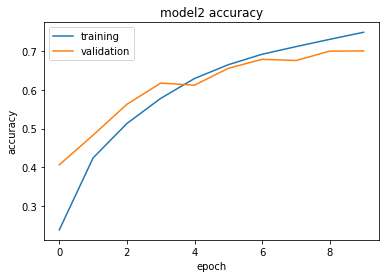

In [123]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Stage 3

Convolutional input layer, 32 feature maps with a size of 3×3 and a rectiﬁer activation function.
Dropout layer at 20%.
Convolutional layer, 32 feature maps with a size of 3×3 and a rectiﬁer activation function.
Max Pool layer with size 2×2.
Convolutional layer, 64 feature maps with a size of 3×3 and a rectiﬁer activation function.
Dropout layer at 20%.
Convolutional layer, 64 feature maps with a size of 3×3 and a rectiﬁer activation function.
Max Pool layer with size 2×2.
Convolutional layer, 128 feature maps with a size of 3×3 and a rectiﬁer activation function.
Dropout layer at 20%.
Convolutional layer, 128 feature maps with a size of 3×3 and a rectiﬁer activation function.
Max Pool layer with size 2×2.
Flatten layer.
Dropout layer at 20%.
Fully connected layer with 1,024 units and a rectiﬁer activation function.
Dropout layer at 20%.
Fully connected layer with 512 units and a rectiﬁer activation function.
Dropout layer at 20%.
Fully connected output layer with 10 units and a softmax activation function.

In [0]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu', padding='same')) 
model3.add(Dropout(0.2)) 
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model3.add(MaxPooling2D(pool_size=(2, 2))) 
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model3.add(Dropout(0.2)) 
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model3.add(MaxPooling2D(pool_size=(2, 2))) 
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model3.add(Dropout(0.2)) 
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model3.add(MaxPooling2D(pool_size=(2, 2))) 
model3.add(Flatten()) 
model3.add(Dropout(0.2)) 
model3.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model3.add(Dropout(0.2)) 
model3.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model3.add(Dropout(0.2)) 
model3.add(Dense(num_classes, activation='softmax'))

# Compiling the Model
We need to compile the CNN model before we train it. We can use the compile() method for this. Also, let’s define the learning rate for training.

In [0]:
lrate = 0.01 
sgd = SGD(lr=lrate, momentum=0.9, decay=1e-6,nesterov=False) 
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Training the Image Classification Model
Now, it is time to train our model and see its accuracy. We can use the fit() method of keras to train the CNN.

In [115]:
history3=model3.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 414s 10ms/step - loss: 1.8978 - acc: 0.2961 - val_loss: 1.7080 - val_acc: 0.3770
Epoch 2/10
40000/40000 [==============================] - 411s 10ms/step - loss: 1.5014 - acc: 0.4513 - val_loss: 1.4094 - val_acc: 0.4907
Epoch 3/10
40000/40000 [==============================] - 413s 10ms/step - loss: 1.3017 - acc: 0.5286 - val_loss: 1.1920 - val_acc: 0.5723
Epoch 4/10
40000/40000 [==============================] - 410s 10ms/step - loss: 1.1531 - acc: 0.5878 - val_loss: 1.1554 - val_acc: 0.5907
Epoch 5/10
40000/40000 [==============================] - 410s 10ms/step - loss: 1.0294 - acc: 0.6346 - val_loss: 0.9312 - val_acc: 0.6733
Epoch 6/10
40000/40000 [==============================] - 409s 10ms/step - loss: 0.9336 - acc: 0.6712 - val_loss: 0.8934 - val_acc: 0.6850
Epoch 7/10
40000/40000 [==============================] - 410s 10ms/step - loss: 0.8669 - acc: 0.6959 - val_loss: 0.

In [116]:
# Final evaluation of the model 
scores = model3.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 72.82%


# Visualizing Accuracy
visualize the training accuracy and the validation accuracy :

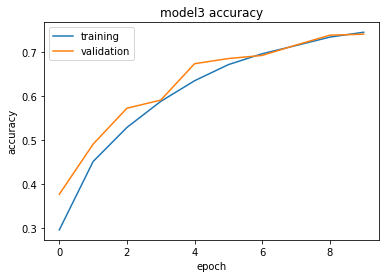

In [117]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


# Conclusion：
By building a 1 and 6 layer neural network along with its visualization, resulting in % accuracy of classification with graphical interpretation. we will see the results and compare the three networks in terms of the accuracy and speed of training for each epoch.

**COMPARISON ACCURACY [%] BETWEEN 1-LAYER AND 6-LAYER CNN**
As we can see in the chart below, the neural network training accuracy is considerably higher for a model3 6-layer network.

**COMPARISON TIME OF LEARNING PROCESS BETWEEN 1-LAYER AND 6-LAYER CNN**
As we can see in the chart below, the neural network training time is considerably longer for a model3 6-layer network.

# Summary:
What is Keras library and how to use it.
What is Deep Learning.
How to use ready datasets.
What is Convolutional Neural Networks(CNN).
How to build step by step Convolutional Neural Networks(CNN).
What are differences in model results.
Basics of Machine Learning.
Introduction to Artificial Intelligence(AI).
What is the confusion matrix and how to visualize it.

Bibliography: https://notebooks.azure.com/anon-avbgjg/projects/examples-1/html/cifar.ipynb  
   https://keras.io/examples/cifar10_cnn/